# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import pprint
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
#import citypy run: pip install citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [22]:
import pprint
pprint.pp(cities)

['sisimiut',
 'leningradskiy',
 'severo-kurilsk',
 'albany',
 'mbeya',
 'new norfolk',
 'rikitea',
 'mar del plata',
 'punta arenas',
 'lagoa',
 'barentsburg',
 'lompoc',
 'ushuaia',
 'luis correia',
 'hobart',
 'attawapiskat',
 'huarmey',
 'auki',
 'clyde river',
 'norman wells',
 'djibo',
 'deskati',
 'saint-philippe',
 'edendale',
 'puerto ayora',
 'harlingen',
 'belmonte',
 'sioux lookout',
 'san patricio',
 'haines junction',
 'buala',
 'mataura',
 'nikolskoye',
 'vaini',
 'neiafu',
 'saskylakh',
 'mitsamiouli',
 'ponta grossa',
 'evensk',
 'srednekolymsk',
 'vaitupu',
 'elko',
 'bluff',
 'tidore',
 'hobyo',
 'ribeira grande',
 'busselton',
 'springdale',
 'castro',
 'kapaa',
 'bambous virieux',
 'muli',
 'ruatoria',
 'charters towers',
 'verkh-usugli',
 'muros',
 'san vicente',
 'bandrele',
 'nkayi',
 'ostrovnoy',
 'sabha',
 'port alfred',
 'kaitangata',
 'bredasdorp',
 'bundu',
 'stoyba',
 'kavieng',
 'lorengau',
 'jamestown',
 'tuktoyaktuk',
 'geraldton',
 'bengkulu',
 'niquela

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)
qjson = requests.get(f'{query_url}san diego').json()

pprint.pp(qjson)

http://api.openweathermap.org/data/2.5/weather?appid=2bf09c264630bd0a49d6d608d5307394&units=metric&q=
{'coord': {'lon': -117.16, 'lat': 32.72},
 'weather': [{'id': 801,
              'main': 'Clouds',
              'description': 'few clouds',
              'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 17.11,
          'feels_like': 14.32,
          'temp_min': 15.56,
          'temp_max': 18.33,
          'pressure': 1026,
          'humidity': 39},
 'visibility': 10000,
 'wind': {'speed': 1.85, 'deg': 267},
 'clouds': {'all': 20},
 'dt': 1609616965,
 'sys': {'type': 1,
         'id': 5771,
         'country': 'US',
         'sunrise': 1609599069,
         'sunset': 1609635255},
 'timezone': -28800,
 'id': 5391811,
 'name': 'San Diego',
 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed= []
country = []
list_cities = []


In [33]:
i = 0
city_missing = []
missctycnt = 0
for x in cities:
    response = requests.get(query_url + x).json()
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
                
        list_cities.append(x)
        i +=1
        
        #print(f"i count: {i} | {x}") # should have a total of 624 cities count
    except :
        #print ("unable to find city")
        city_missing.append(x) #add cities that were not found
        missctycnt +=1 #count Missing cities
        pass
              
print("Review city count | make sure cities are matching")
print(f"Total cities in list: {i}")
print(f"Total missing lists: {missctycnt}")

Review city count | make sure cities are matching
Total cities in list: 570
Total missing lists: 54


In [38]:
#capture data into a dataframe to reuse
cityall_df = pd.DataFrame({'City': list_cities,
                           'Lat': lat,
                           'Lng': lng,
                           'Max Temp': maxtemp,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': windspeed,
                           'Country': country                         
                          
                          } )

cityall_df.head()
cityall_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
cityhumidity = cityall_df.loc[cityall_df['Humidity']>100,:]
print(f"Total cities where the humidity is over 100% {cityhumidity['City'].count()}")

Total cities where the humidity is over 100% 0


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [61]:
from datetime import date
today = date.today()

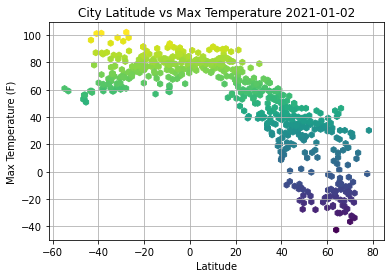

In [83]:
#Plot for latitude vs temperature. Convert max temperature from C to F degrees
x = cityall_df['Lat']
#(Celsius * 9/5) + 32
y = (cityall_df['Max Temp']*9/5)+32
plt.scatter(x,y, c=y, marker='h')
plt.grid()
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs Max Temperature {today}')


plt.savefig(f'output_data/lat_vs_temperature_{today}.png')
plt.show()

## Latitude vs. Humidity Plot

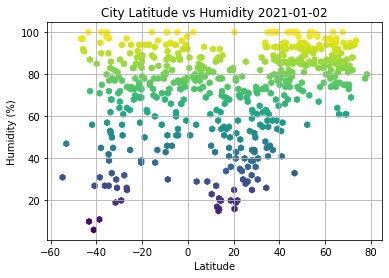

In [84]:
#Plot for latitude vs Humidity.
x = cityall_df['Lat']
y = cityall_df['Humidity']
plt.scatter(x,y, c=y, marker='h')
plt.grid()
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs Humidity {today}')

plt.savefig(f'output_data/lat_vs_humidity_{today}.png')
plt.show()

## Latitude vs. Cloudiness Plot

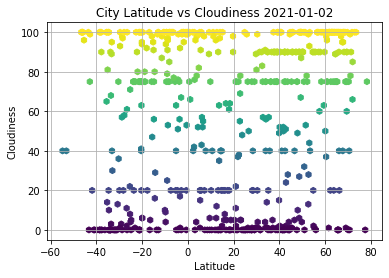

In [87]:
#Plot for latitude vs Humidity.
x = cityall_df['Lat']
y = cityall_df['Cloudiness']
plt.scatter(x,y, c=y, marker='h')
plt.grid()
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs Cloudiness {today}')

plt.savefig(f'output_data/lat_vs_cloudiness_{today}.png')
plt.show()

## Latitude vs. Wind Speed Plot

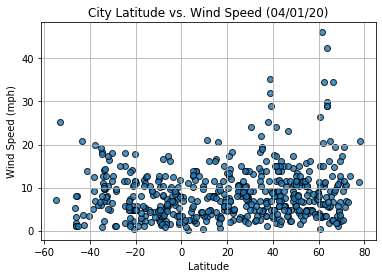

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


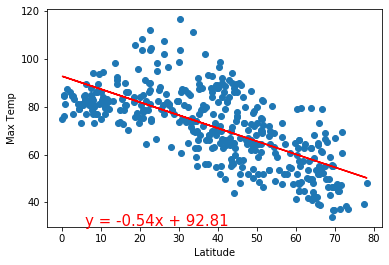

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


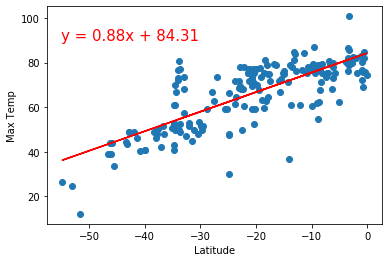

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


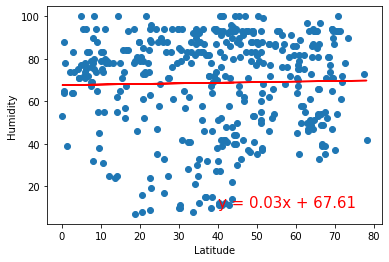

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


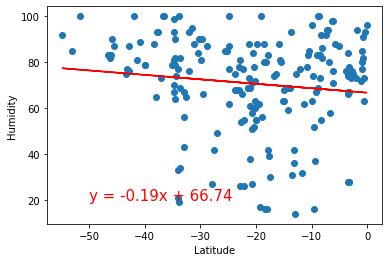

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


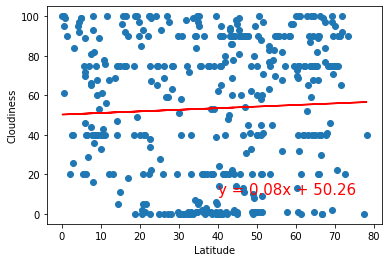

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


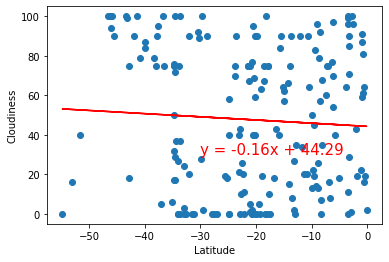

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


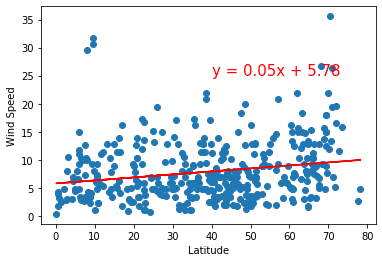

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


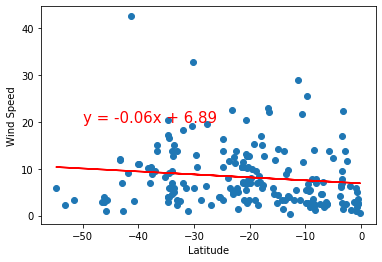